Module 02: Data Cleaning
========================

Our second phase entails the data cleaning process. This phase is
critical since cleaner data compensates for a lot more than any
algorithm could.

Check for Duplicates
--------------------

Let’s start by removing any duplicates.

**Objectives:**

-   Remove duplicate observations and account for changes

Import the libraries and load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# change pandas option to view additional data frame columns
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the real estatate data
df = pd.read_csv('../dataset/real_estate_data.csv')

Next, we review our data frame shape, call for the removal of
duplicates, and determine if any were removed.

In [2]:
# Drop duplicates and check on the data frame's shape for differences
df.shape

(1883, 26)

In [3]:
df = df.drop_duplicates()
df.shape

(1883, 26)

Based on the fact that our data frame shape stayed the same, we can
determine that there were no duplicates.

Structural Errors
-----------------

Next, we want to check for and account for any structural errors.

**Objectives:**

-   Replace any variables that should be binary indicators
-   Fix typos and capitalization issues for categorical features
-   Check for and consolidate mislabeled classes

In our first phase, we determined that our basement feature could be
modified to show whether a property had a basement or not. We’ll change
this feature to replace the missing values with zero.

In [4]:
# display unique values for given series
df.basement.unique()

# replace all NaN values with zero
df['basement'] = df.basement.fillna(0)

Next, let’s check for and fix any typos or capitalization errors. We can
also start consolidating features, if necessary.

In [5]:
# display unique classes and their count
df.roof.sort_values().value_counts()

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Asbestos                    9
Slate                       9
Composition                 5
asphalt                     5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

In [6]:
# replace categorical data
df.roof.replace(to_replace='composition', value='Composition', inplace=True)
df.roof.replace(to_replace='asphalt', value='Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

In [7]:
# validate the changes made
df.roof.sort_values().unique()

array(['Asbestos', 'Asphalt', 'Built-up', 'Composition',
       'Composition Shingle', 'Gravel/Rock', 'Metal', 'Other',
       'Roll Composition', 'Shake Shingle', 'Slate',
       'Wood Shake/ Shingles', nan], dtype=object)

Let’s repeat the process for our exterior walls.

In [8]:
# display unique classes and their count
df.exterior_walls.sort_values().value_counts()

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

In [9]:
# consolidate values
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

Unwanted Outliers
-----------------

Let’s remove any unwanted outliers that can negatively impact our
regression model. The removal of these outliers need to be justified, as
removing the wrong ones can also be an issue.

**Objectives:**

-   Check for measurements that are unlikely to be real data
-   Determine if any outliers belong to a different population data set
-   Consider outliers that may not pertain to the problem at hand

Let’s make use of a violin plot to visualize both summary statistics and
probability distribution.

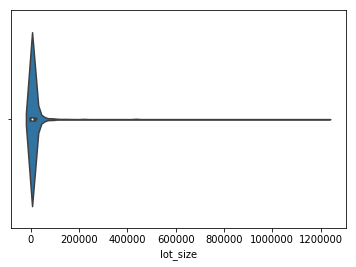

In [10]:
# build a seaborn violin plot of the tx_price
sns.violinplot(x=df.lot_size, data=df)

We’ll check other features for potential outliers.

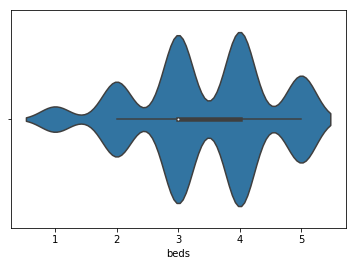

In [11]:
# violin plot of beds
sns.violinplot(df.beds)

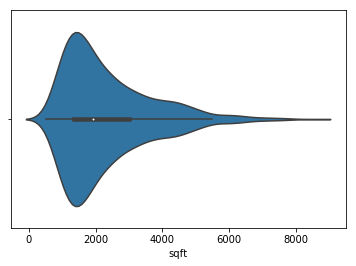

In [12]:
# violin plot of sqft
sns.violinplot(df.sqft)

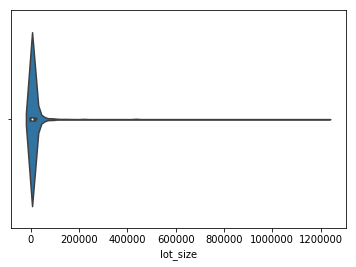

In [13]:
# violin plot of lot_size
sns.violinplot(df.lot_size)

Looking at our violin plot of the lot size, we can see that there may be
a potential outlier. We can further investigate this by reviewing the
series top values.

In [14]:
# sort values to review for extreme boundry outliers
df.lot_size.sort_values(ascending=False)[:5]

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

We can see that the top lot size value is significantly greater than any
of the other four values. Since it will be unlikely that our client will
invest in properties this large, we can remove it from the dataset.

In [15]:
# use a boolean mask to remove unwanted onservations
df = df[df.lot_size <= 500000]

# review the dataframe shape to confirm its removal
df.shape

(1882, 26)

Missing Categorical Data
------------------------

Rather than dropping or imputing null values, it’s often times better to
explicitly state the values are missing.

**Objectives:**

-   Account for null values and replace them with ‘Missing’

In [16]:
# check for null value count by object dtypes
df.select_dtypes(include='object').isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [17]:
# loop through object dtypes and replace null values with 'missing'
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

# verify that all null values have been replaced
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Missing Numeric Data
--------------------

As with categorical data, we need to be explicit if there any missing
values.

-   Create new boolean feature indicating whether values are missing
-   Set all null values to zero

Let’s start off by checking for any missing values.

In [18]:
# get sum of all missing values for numeric features
df.select_dtypes(exclude='object').isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

There doesn’t appear to be any missing numerical data, so we are
finished with the data cleaning phase. Before moving on, let’s export
our updated dataset.

In [19]:
df.to_csv('../dataset/cleaned_df.csv', index=None)

Next Module
-----------

[03. Feature Engineering](module03.ipynb)